# IMPORT LIBRARIES


In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing Dataset
Housedf = pd.read_csv("house_price_pred.csv")

In [3]:
#accesing first 6 datavalues
Housedf.head(6)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 00:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 00:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 00:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 00:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 00:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,02-05-2014 00:00,490000.0,2,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA


In [4]:
#reading the last 5 datavalues
Housedf.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,09-07-2014 00:00,308166.6667,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,09-07-2014 00:00,534333.3333,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,09-07-2014 00:00,416904.1667,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,10-07-2014 00:00,203400.0000,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA
4599,10-07-2014 00:00,220600.0000,3,2.50,1490,8102,2.0,0,0,4,1490,0,1990,0,18717 SE 258th St,Covington,WA 98042,USA


In [5]:
#shape of dataset
Housedf.shape

(4600, 18)

In [6]:
#all the columns in dataset
Housedf.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [7]:
#Hence we dont wont date and statezip we drop them using drop
Housedf = Housedf.drop("date",axis=1)
Housedf = Housedf.drop("statezip",axis=1)

In [8]:
Housedf.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
country           object
dtype: object

In [9]:
#we have to convert data into int or float
Housedf["price"]=Housedf["price"].astype(int)
Housedf["bedrooms"]=Housedf["price"].astype(int)
Housedf["bathrooms"]=Housedf["price"].astype(int)
Housedf["floors"]=Housedf["price"].astype(int)

In [10]:
#Hence we have different data in strings we can converts into birany data
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
Housedf["street"]=LE.fit_transform(Housedf["street"])
Housedf["city"]=LE.fit_transform(Housedf["city"])
Housedf["country"]=LE.fit_transform(Housedf["country"])

In [11]:
Housedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   price          4600 non-null   int32
 1   bedrooms       4600 non-null   int32
 2   bathrooms      4600 non-null   int32
 3   sqft_living    4600 non-null   int64
 4   sqft_lot       4600 non-null   int64
 5   floors         4600 non-null   int32
 6   waterfront     4600 non-null   int64
 7   view           4600 non-null   int64
 8   condition      4600 non-null   int64
 9   sqft_above     4600 non-null   int64
 10  sqft_basement  4600 non-null   int64
 11  yr_built       4600 non-null   int64
 12  yr_renovated   4600 non-null   int64
 13  street         4600 non-null   int32
 14  city           4600 non-null   int32
 15  country        4600 non-null   int32
dtypes: int32(7), int64(9)
memory usage: 449.3 KB


In [12]:
#types of data values
Housedf.dtypes.value_counts()

int64    9
int32    7
dtype: int64

In [13]:
#checking the null vaues
Housedf.isnull().values.any()

False

In [14]:
#checking the duplicate values
Housedf.duplicated().sum()

0

In [15]:
Housedf.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.975435,563834.706028,0.0,322875.00,460943.0,654962.50,26590000.0
bedrooms,4600.0,551962.975435,563834.706028,0.0,322875.00,460943.0,654962.50,26590000.0
bathrooms,4600.0,551962.975435,563834.706028,0.0,322875.00,460943.0,654962.50,26590000.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.0,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.0,11001.25,1074218.0
floors,4600.0,551962.975435,563834.706028,0.0,322875.00,460943.0,654962.50,26590000.0
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.0,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.0,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.0,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.0,2300.00,9410.0


### CORRELATION

In [16]:
Housedf.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,country
price,1.000000,1.000000,1.000000,0.430410,0.050451,1.000000,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774,0.029366,0.018625,NaN
bedrooms,1.000000,1.000000,1.000000,0.430410,0.050451,1.000000,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774,0.029366,0.018625,NaN
bathrooms,1.000000,1.000000,1.000000,0.430410,0.050451,1.000000,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774,0.029366,0.018625,NaN
sqft_living,0.430410,0.430410,0.430410,1.000000,0.210538,0.430410,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817,0.006411,-0.109686,NaN
sqft_lot,0.050451,0.050451,0.050451,0.210538,1.000000,0.050451,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730,-0.023028,-0.079135,NaN
floors,1.000000,1.000000,1.000000,0.430410,0.050451,1.000000,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774,0.029366,0.018625,NaN
waterfront,0.135648,0.135648,0.135648,0.117616,0.017241,0.135648,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625,0.035448,0.001450,NaN
view,0.228504,0.228504,0.228504,0.311009,0.073907,0.228504,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967,0.065077,0.001340,NaN
condition,0.034915,0.034915,0.034915,-0.062826,0.000558,0.034915,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818,-0.005480,-0.010592,NaN
sqft_above,0.367570,0.367570,0.367570,0.876443,0.216455,0.367570,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426,-0.013709,-0.121701,NaN


<AxesSubplot:>

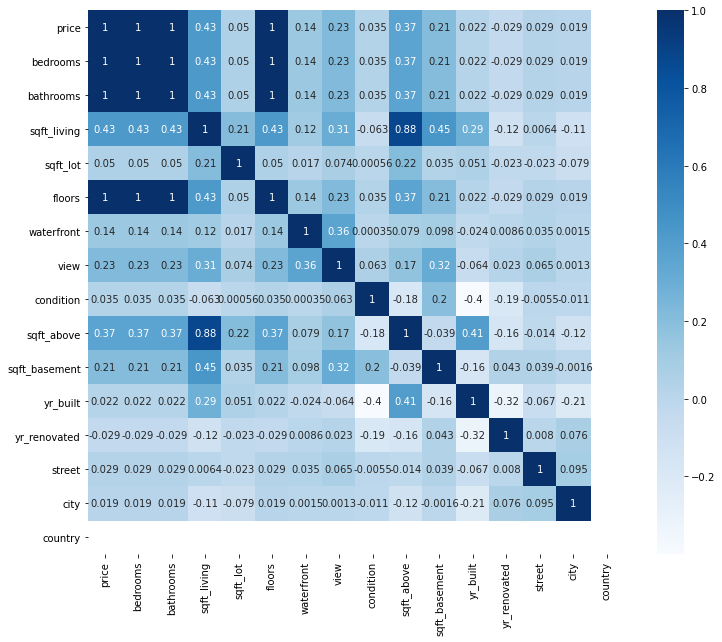

In [17]:
#correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(Housedf.corr(), annot = True, cmap="Blues")

# DATA VISUALIZATION

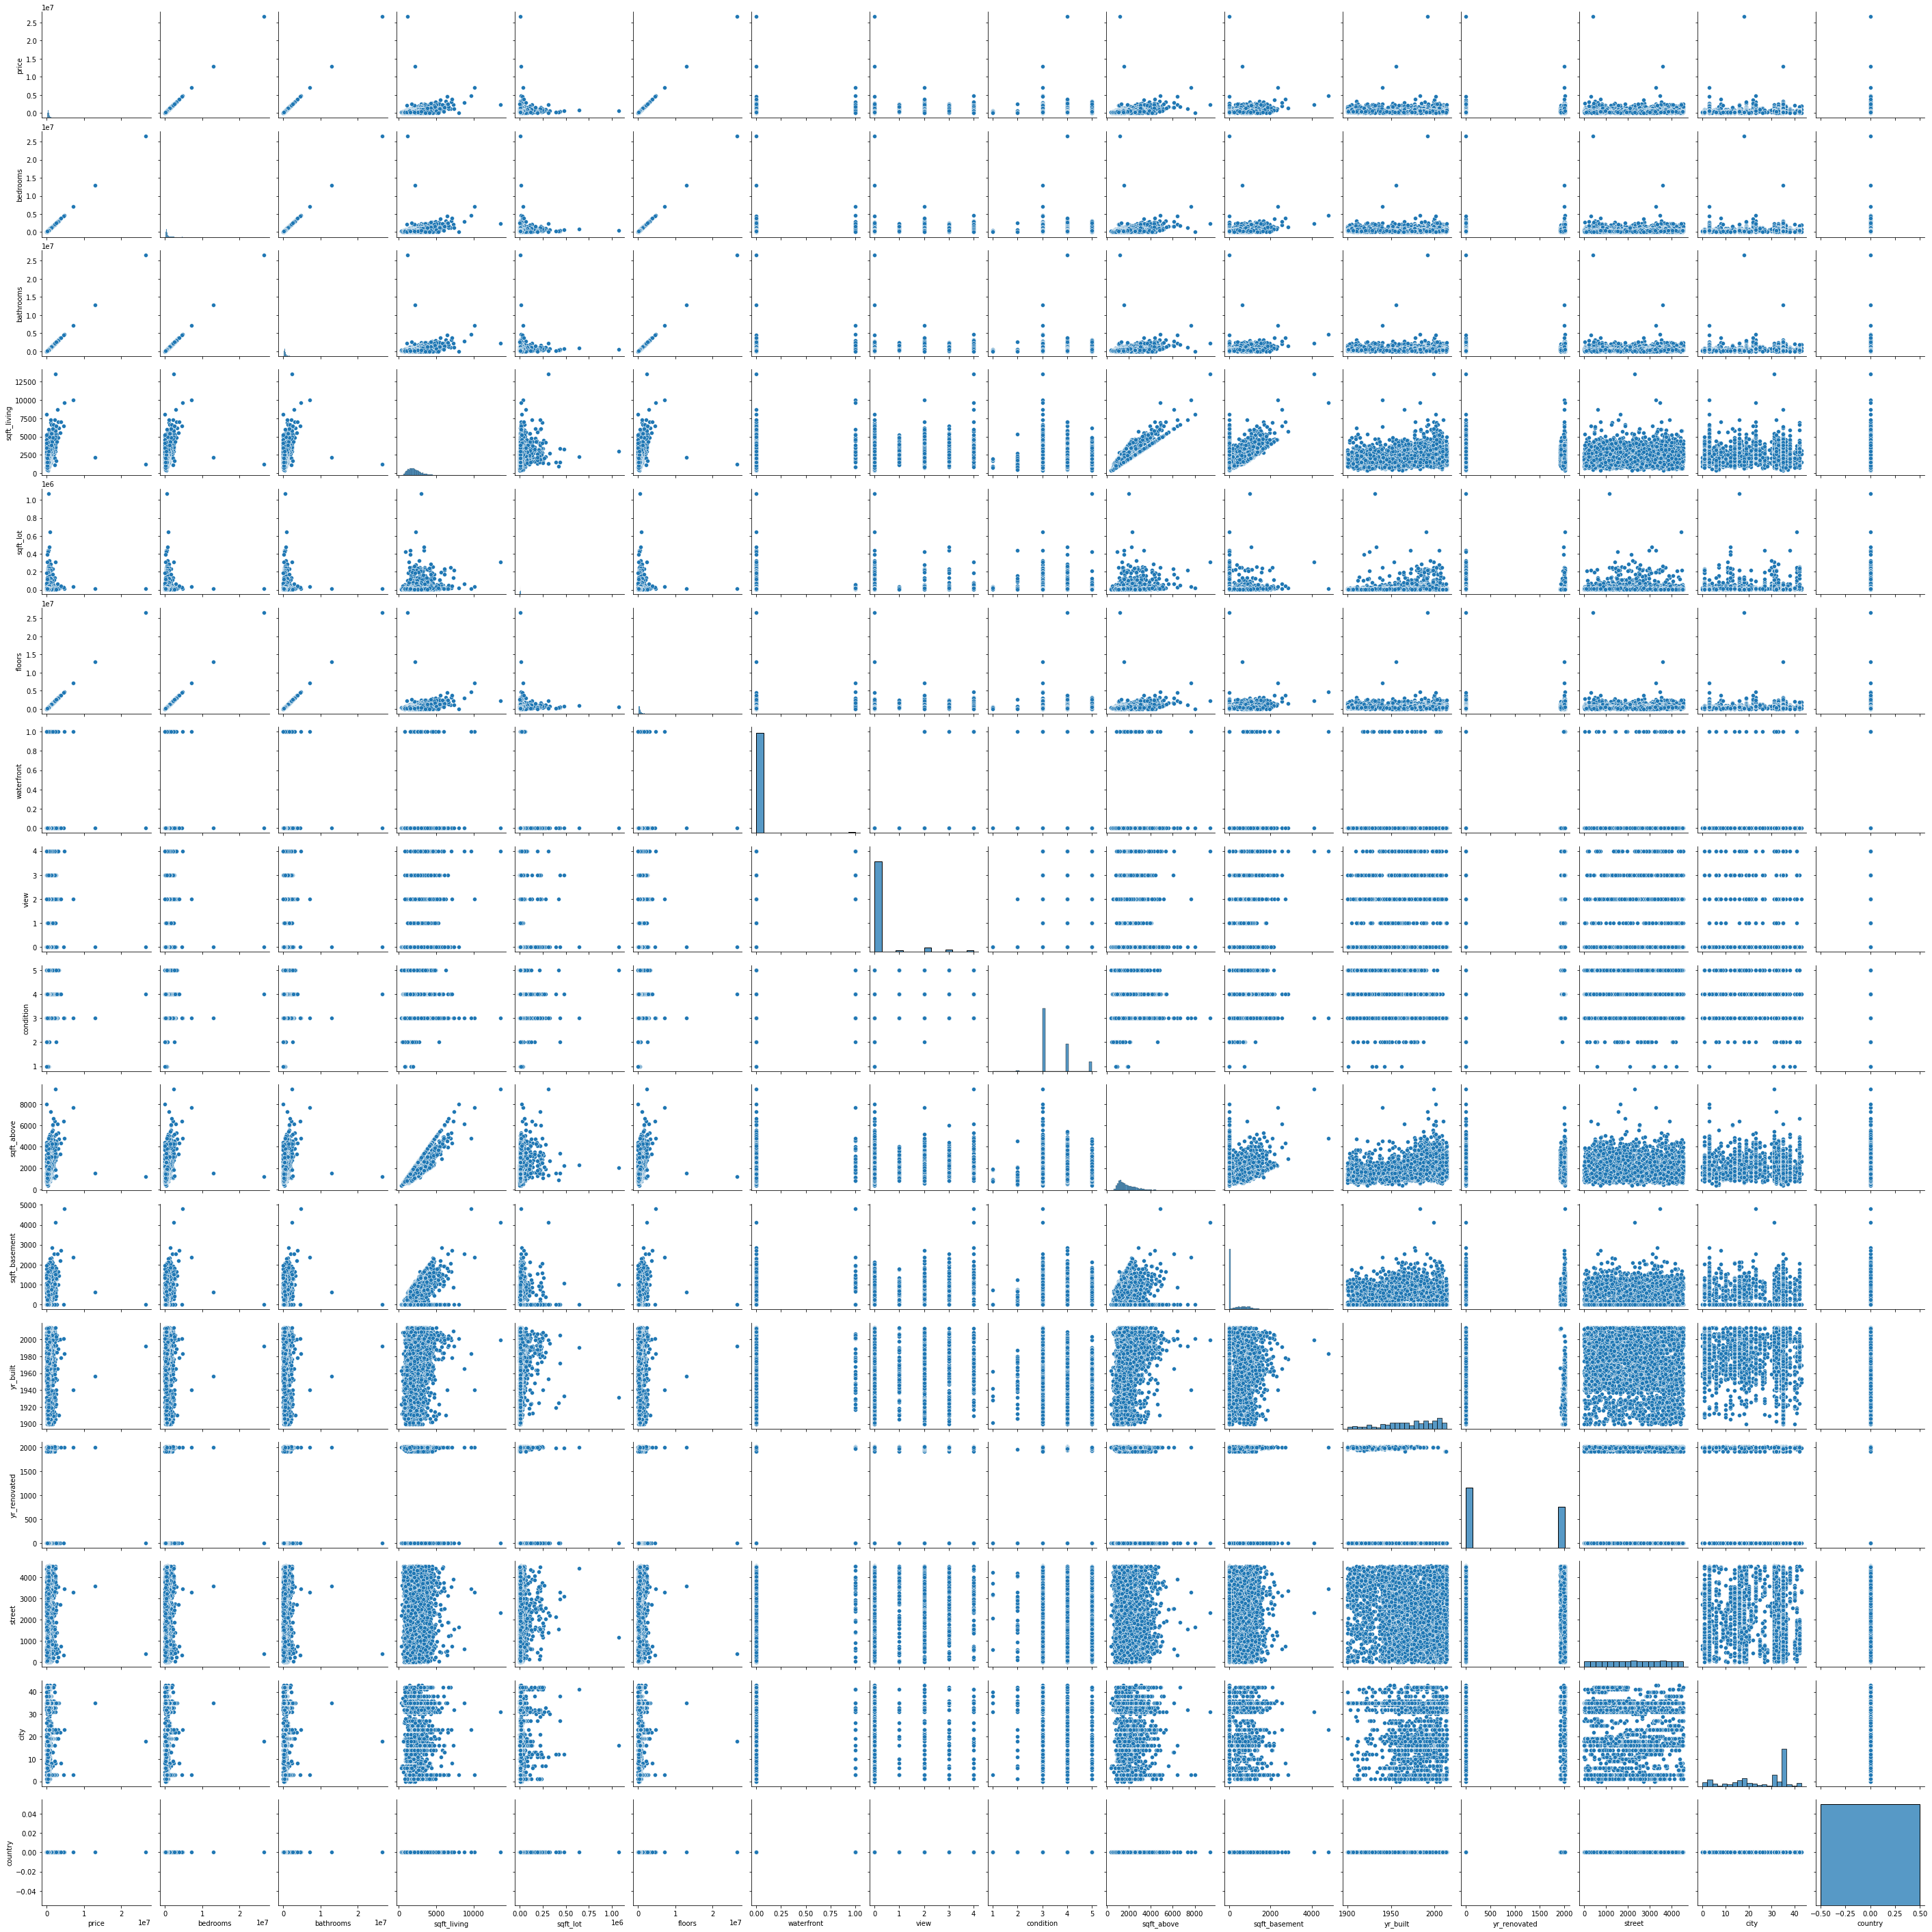

In [18]:
sns.pairplot(Housedf)


<AxesSubplot:xlabel='yr_built', ylabel='price'>

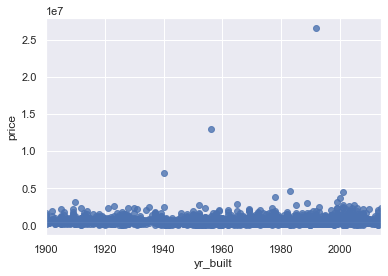

In [19]:
#house price with year built
sns.set(style="darkgrid")
sns.regplot(x=Housedf['yr_built'], y=Housedf["price"])

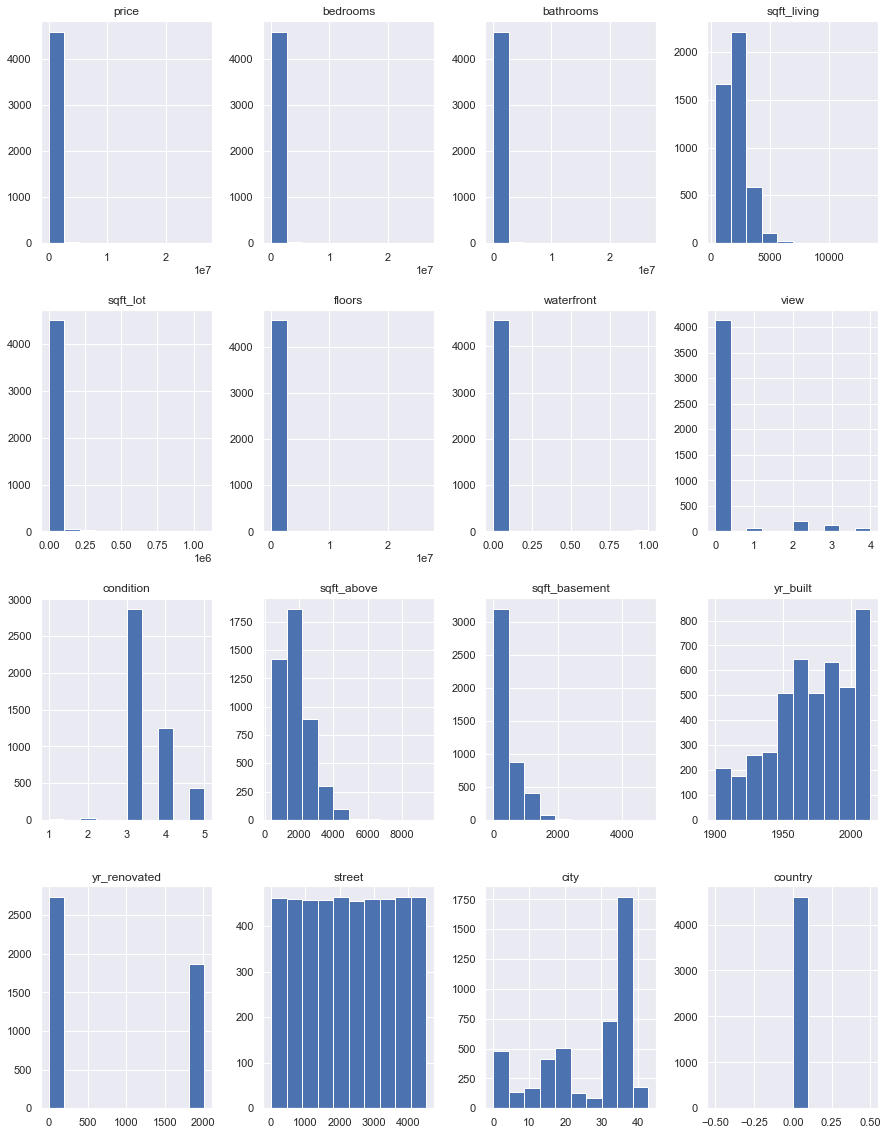

In [20]:
#histographical representation
Housedf.hist(figsize=(15,20))
plt.show()

<AxesSubplot:xlabel='price', ylabel='city'>

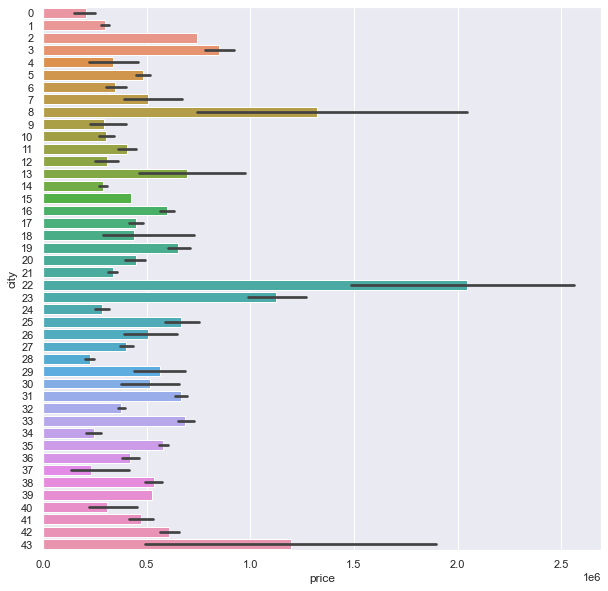

In [21]:
#bar plot of house price in each cities mentioned
plt.figure(figsize=(10,10))
sns.barplot(data=Housedf,y='city',x='price',orient="h3")

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

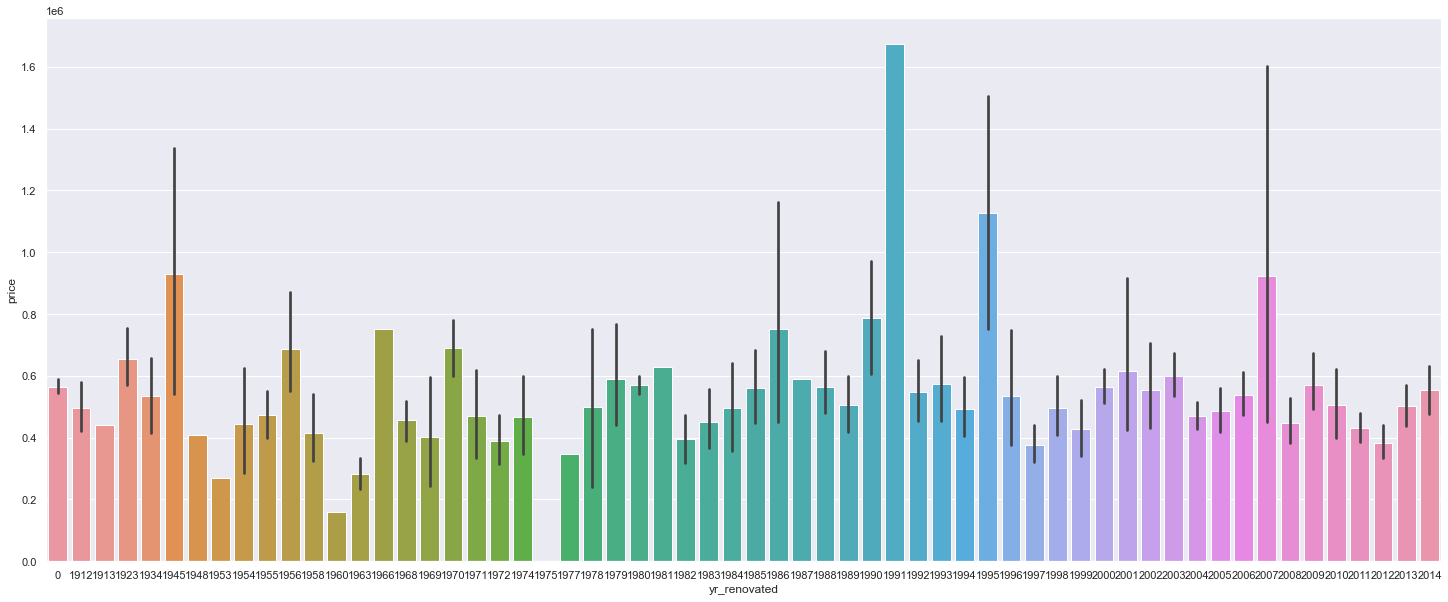

In [22]:
#bar plot of house price with renovated year
plt.figure(figsize=(25,10))
sns.barplot(x=Housedf["yr_renovated"],y=Housedf["price"])

# Train Test Splitting

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x =Housedf.drop('price',axis =1).values
y =Housedf['price'].values

In [25]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

# Random Foresr Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [27]:
rf.fit(x_train, y_train)
rf.score(x_train, y_train)

0.991304347826087

In [28]:
pred = rf.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.23695652173913043

### Model accuracy with Random Forest Classifier: 23.69%

# Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression 
regg=LinearRegression()
regg.fit(x_train, y_train)
y_pred=regg.predict(x_test)

In [30]:
from sklearn.metrics import r2_score
acc=r2_score(y_test,y_pred)
acc

1.0

### Model accuracy with Linear regression: 100%

# Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [32]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5934782608695652


### Model accuracy with Naive Bayes: 59.34%